# Kaggle Competition - Titanic Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


Goal: To predict if a passenger survived the sinking of the Titanic or not.

# Exploratory data analysis
In exploratory data analysis, we'll be doing three things. 

### 1. Data extraction : load the dataset and have a first look at it.
Read our data in using pandas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
print(df.shape)

(891, 12)


Let's see an overview of our data: 

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### 2. Cleaning : do something with missing values.

In [6]:
# Remove useless variable (Ticket, Cabin)
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 3. Plotting : create some charts.

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Distribution of Survival by Sex')

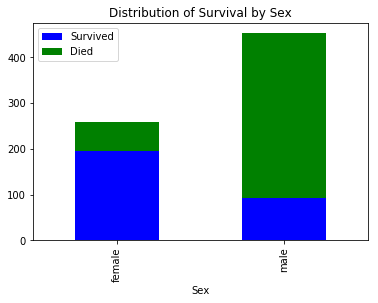

In [10]:
df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, color=['b', 'g'])
plt.title("Distribution of Survival by Sex")

Text(0.5,1,'Distribution of Survival by Sex Ratio')

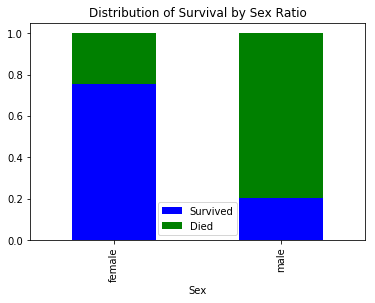

In [11]:
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', stacked=True, color=['b', 'g'])
plt.title("Distribution of Survival by Sex Ratio")

Text(0.5,1,'Survival by Age,  (1 = Survived, 0 = Died)')

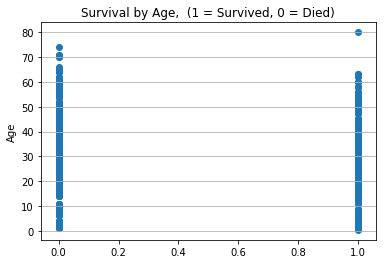

In [12]:
plt.scatter(df.Survived, df.Age)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived, 0 = Died)")

In [13]:
import seaborn as sns

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


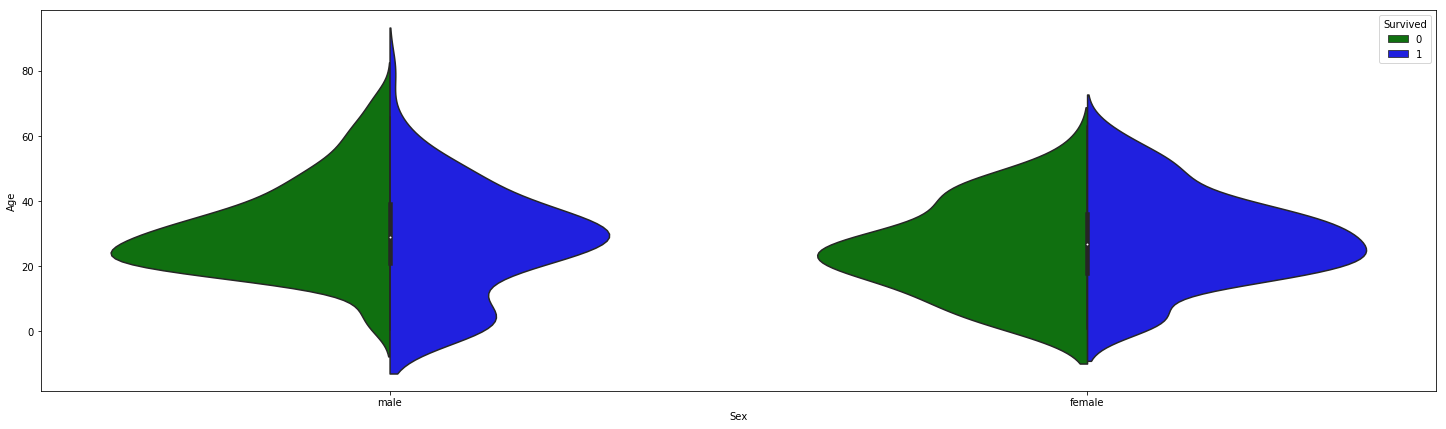

In [14]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: "g", 1: "b"})

Text(0.5,1,'Class Distribution')

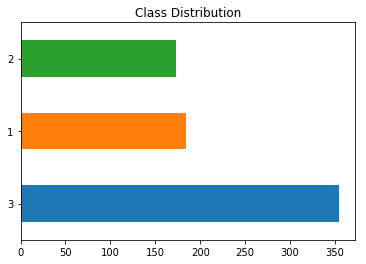

In [15]:
df.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

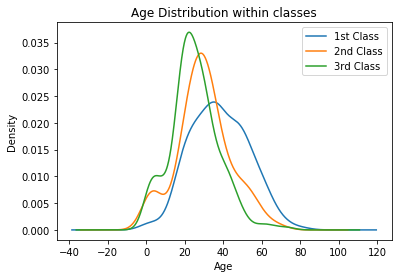

In [16]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

Text(0.5,1,'Passengers per boarding location')

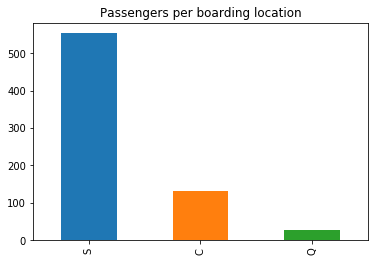

In [17]:
df.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

(-1, 2)

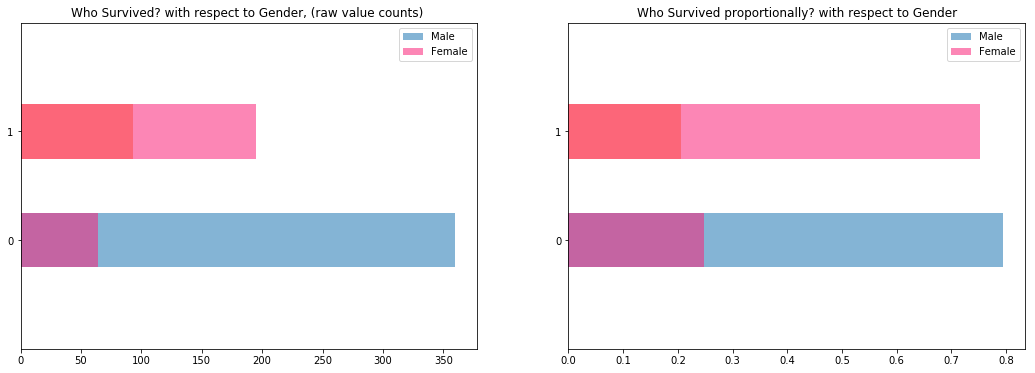

In [18]:
fig = plt.figure(figsize=(18,6))

df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)